# Кластеризация. Домашнее задание № 4

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
geocom = pd.read_excel('geo_comment.xlsx', index_col=0)

In [3]:
geocom.head()

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [4]:
geo = pd.read_excel('geo.xlsx', index_col=0)

In [5]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108806 entries, 0 to 108805
Data columns (total 3 columns):
x                108806 non-null float64
y                108806 non-null float64
comment_class    108806 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.3 MB


In [6]:
geo.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [7]:
geo['comment_class'].value_counts()

-1    95147
 1    13659
Name: comment_class, dtype: int64

In [8]:
# 1. Визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

In [9]:
X = geo.drop('comment_class', axis = 1)

In [10]:
X.head()

,x,y
0,37.612416,55.777454
1,37.612416,55.777454
2,37.603298,55.742108
3,37.558526,55.728758
4,37.566431,55.731794


In [11]:
x = X['x']
y = X['y']

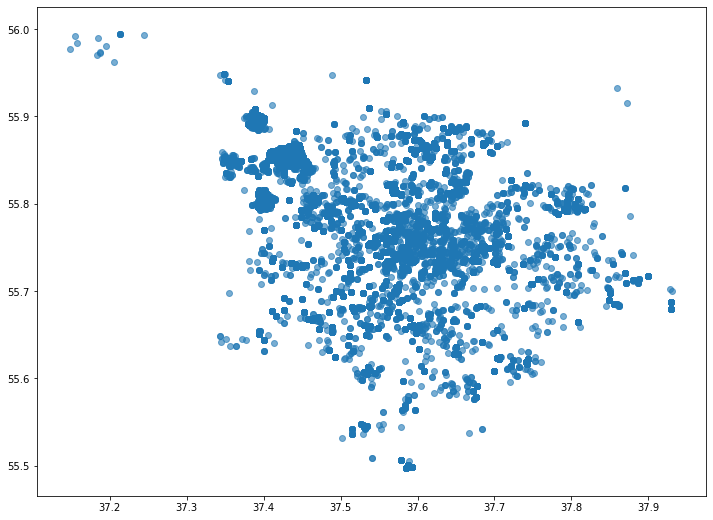

In [12]:
plt.figure(figsize=(12,9))
plt.scatter(x, y, alpha = 0.6)

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=6, init = 'k-means++', max_iter=300)

In [15]:
clusters = kmeans.fit_predict(X)

In [16]:
centers = kmeans.cluster_centers_
cx = centers[:,0]
cy = centers[:,1]

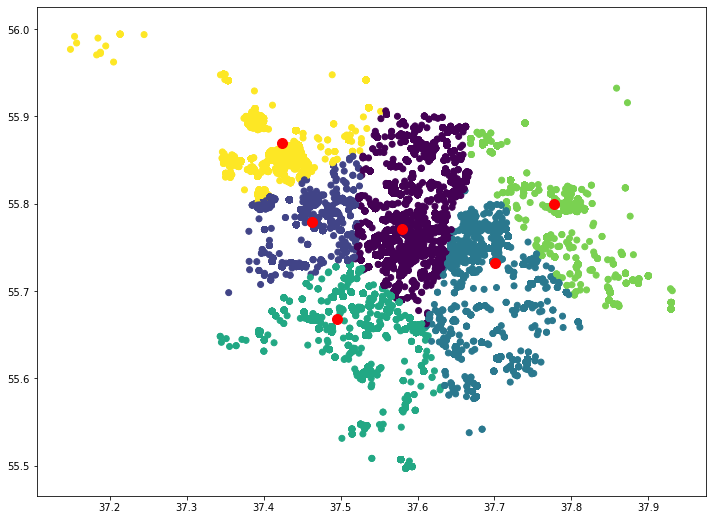

In [17]:
plt.figure(figsize=(12,9))
plt.scatter(x, y, c = clusters)
plt.scatter(cx, cy, s = 100, c = 'red')
plt.show()

In [18]:
#2. Аналогично исследовать скопления голосов за и против отдельно

In [19]:
# Исследование скопления голосов за

In [20]:
za = geo[geo['comment_class'] == 1]
za.head()

,x,y,comment_class
28,37.588916,55.741982,1
45,37.589311,55.734273,1
46,37.558526,55.728758,1
47,37.566431,55.731794,1
61,37.589311,55.734273,1


In [21]:
X_za = za.drop('comment_class', axis=1)
X_za.head()

,x,y
28,37.588916,55.741982
45,37.589311,55.734273
46,37.558526,55.728758
47,37.566431,55.731794
61,37.589311,55.734273


In [22]:
x = X_za.x 
y = X_za.y

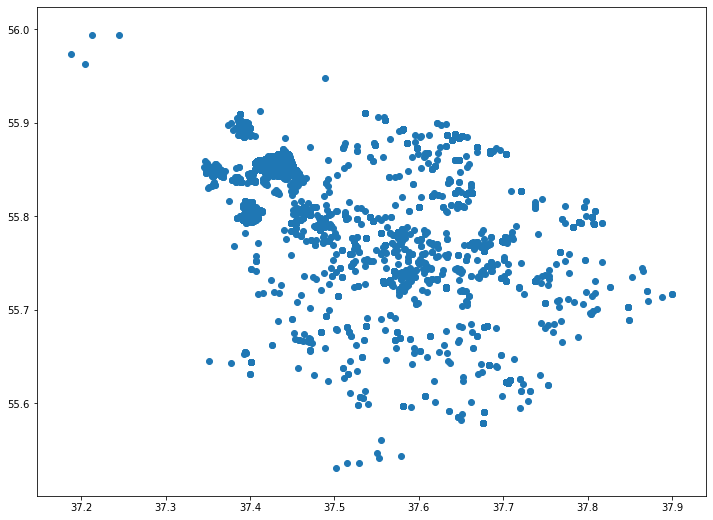

In [23]:
plt.figure(figsize=(12,9))
plt.scatter(x, y)
plt.show()

In [24]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', max_iter=300)

In [25]:
clusters = kmeans.fit_predict(X_za)

In [26]:
centers = kmeans.cluster_centers_
cx = centers[:,0]
cy = centers[:,1]

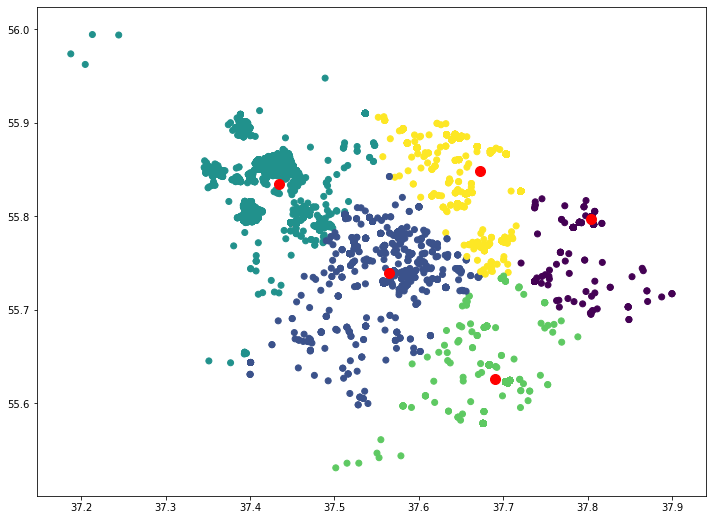

In [27]:
plt.figure(figsize=(12,9))
plt.scatter(x, y, c = clusters)
plt.scatter(cx, cy, s = 100, c = 'red')
plt.show()

In [28]:
# Исследование скопления голосов против

In [29]:
protiv = geo[geo['comment_class'] == -1]
protiv.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [30]:
X_protiv = protiv.drop('comment_class', axis=1)
X_protiv.head()

,x,y
0,37.612416,55.777454
1,37.612416,55.777454
2,37.603298,55.742108
3,37.558526,55.728758
4,37.566431,55.731794


In [31]:
x = X_protiv['x']
y = X_protiv['y']

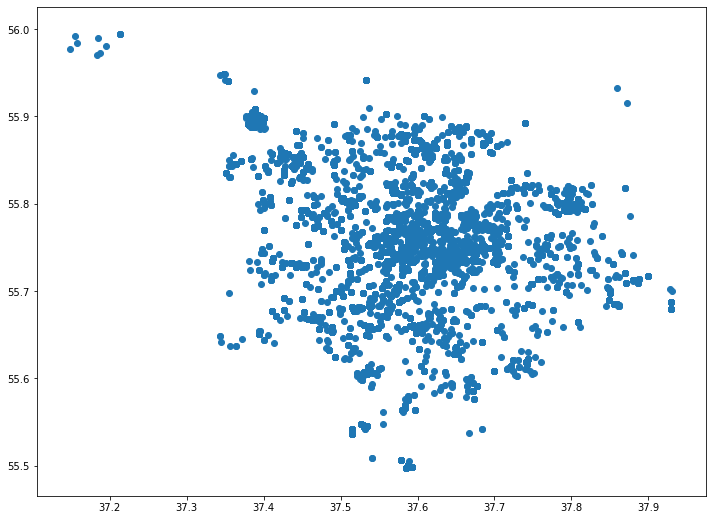

In [32]:
plt.figure(figsize=(12,9))
plt.scatter(x, y)
plt.show()

In [33]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300)

In [34]:
clusters = kmeans.fit_predict(X_protiv)

In [35]:
centers = kmeans.cluster_centers_
cx = centers[:,0]
cy = centers[:,1]

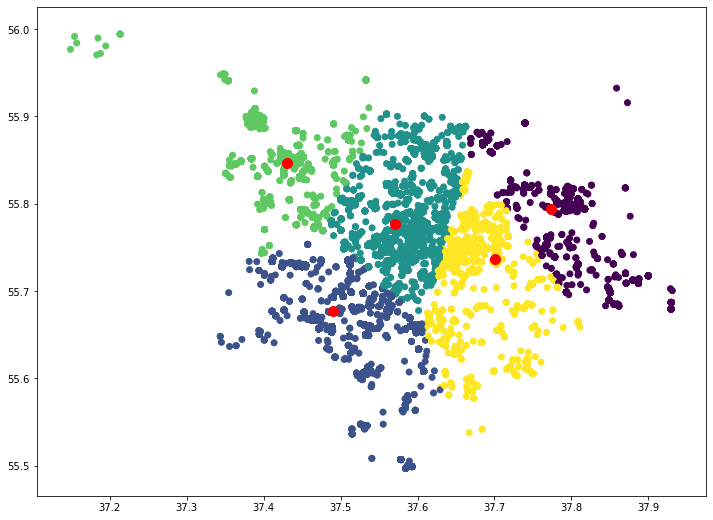

In [36]:
plt.figure(figsize=(12,9))
plt.scatter(x, y, c = clusters)
plt.scatter(cx, cy, s = 100, c = 'red')
plt.show()

In [37]:
#3. Подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально) 

In [38]:
# Подберем для случая, когда голоса За

In [39]:
k_inertia = []
ks = range(1,11)

for k in ks:
    kmeans = KMeans(n_clusters=k)
    clusters_kmeans = kmeans.fit_predict(X_za, )
    k_inertia.append(kmeans.inertia_)

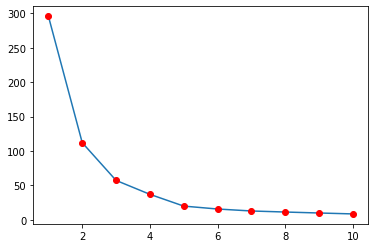

In [40]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

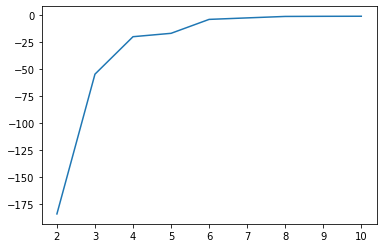

In [41]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

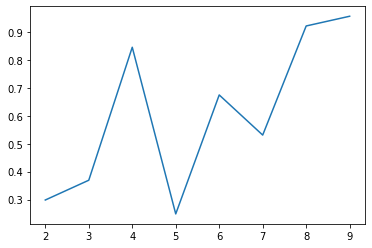

In [42]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

In [43]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

5

In [44]:
#4. Найти наиболее активные в голосовании районы (подсказка: DBSCAN, 
# не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')

In [45]:
# Для районов, которые За (на моем компьютере для всего датасета DBSCAN не отрабатывает)

In [46]:
from sklearn.cluster import DBSCAN

In [47]:
dbscan = DBSCAN (eps = 0.2)

In [48]:
clusters = dbscan.fit_predict(X_za)

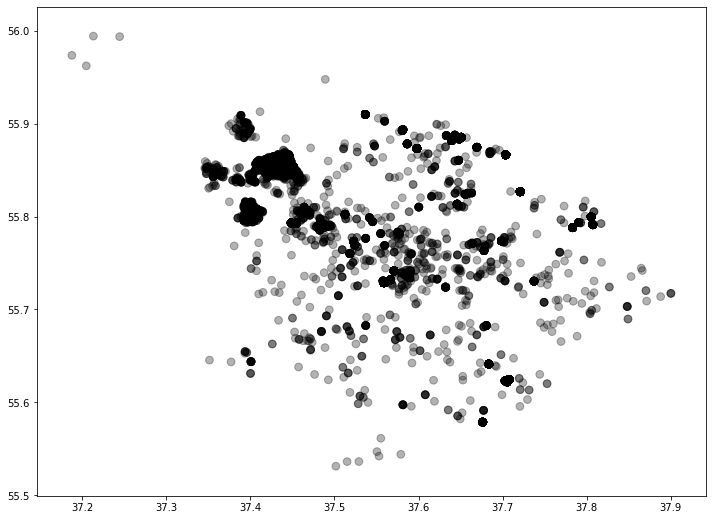

In [49]:
plt.subplots(1, figsize=(12, 9))
plt.scatter(X_za.x, X_za.y, c=clusters, cmap='gray', s=60, alpha=0.3)